## 자바 스크립트로만 풀 수 있어서 난 못 풀었다...ㅠ

# 1.복서

## 문제 설명

복서 선수들의 몸무게 weights와, 복서 선수들의 전적을 나타내는 head2head가 매개변수로 주어집니다. 복서 선수들의 번호를 다음과 같은 순서로 정렬한 후 return 하도록 solution 함수를 완성해주세요.

1. 전체 승률이 높은 복서의 번호가 앞쪽으로 갑니다. 아직 다른 복서랑 붙어본 적이 없는 복서의 승률은 0%로 취급합니다.

2. 승률이 동일한 복서의 번호들 중에서는 자신보다 몸무게가 무거운 복서를 이긴 횟수가 많은 복서의 번호가 앞쪽으로 갑니다.

3. 자신보다 무거운 복서를 이긴 횟수까지 동일한 복서의 번호들 중에서는 자기 몸무게가 무거운 복서의 번호가 앞쪽으로 갑니다.

4. 자기 몸무게까지 동일한 복서의 번호들 중에서는 작은 번호가 앞쪽으로 갑니다.

## 제한사항

weights의 길이는 2 이상 1,000 이하입니다.

weights의 모든 값은 45 이상 150 이하의 정수입니다.

weights[i] 는 i+1번 복서의 몸무게(kg)를 의미합니다.

head2head의 길이는 weights의 길이와 같습니다.

head2head의 모든 문자열은 길이가 weights의 길이와 동일하며, 'N', 
'W', 'L'로 이루어진 문자열입니다.

head2head[i] 는 i+1번 복서의 전적을 의미하며, head2head[i][j]는 i+1번 복서와 j+1번 복서의 매치 결과를 의미합니다.

'N' (None)은 두 복서가 아직 붙어본 적이 없음을 의미합니다.

'W' (Win)는 i+1번 복서가 j+1번 복서를 이겼음을 의미합니다.

'L' (Lose)는 i+1번 복사가 j+1번 복서에게 졌음을 의미합니다.

임의의 i에 대해서 head2head[i][i] 는 항상 'N'입니다. 자기 자신과 싸울 수는 없기 때문입니다.

임의의 i, j에 대해서 head2head[i][j] = 'W' 이면, head2head[j][i] = 'L'입니다.

임의의 i, j에 대해서 head2head[i][j] = 'L' 이면, head2head[j][i] = 'W'입니다.

임의의 i, j에 대해서 head2head[i][j] = 'N' 이면, head2head[j][i] = 'N'입니다.


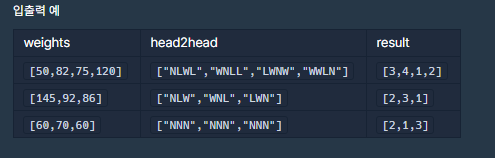

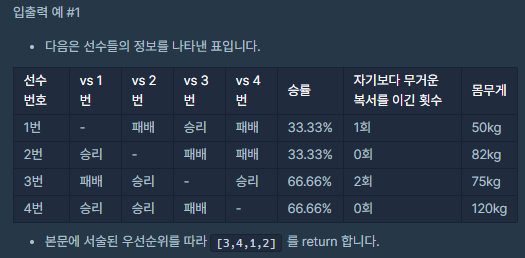

In [32]:
weights=[50,82,75,120]	
head=["NLWL","WNLL","LWNW","WWLN"]

# 결과 리스트
result=[i+1 for i in range(len(weights))]
result

win=[0]*len(result)
weightwin=[0]*len(result)
for i in range(len(head)):
    for j in range(len(head)):
        if head[i][j]=='W':
            win[i]+=1/3
            if weights[i] < weights[j]:
                weightwin[i]+=1

win#1
weightwin #2                
weights# 3
#4 몸무게까지 동일하면 작은번호가 앞으로 감
result

for i in range(1, len(result)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if win[j] < win[j-1]:  # 승률 비교 -> 1
            result[j], result[j-1] = result[j-1], result[j] # swap해서 값 뒤로 밀어내기
        elif win[j]==win[j-1]:
            if weightwin[j] < weightwin[j-1]:# 무게 많이 나가는애 이긴거 비교 -> 2
                result[j], result[j-1] = result[j-1], result[j]
            elif weightwin[j] == weightwin[j-1]:  
                if weights[j] < weights[j-1]: # 몸무게 비교 -> 3
                    result[j], result[j-1] = result[j-1], result[j]
                elif weights[j] == weights[j-1] and result[j] < result[j-1]:
                     result[j], result[j-1] = result[j-1], result[j] 
        else : break # 불필요한 반복을 피하기 위해 break
    

result.reverse()
result

[3, 4, 1, 2]

In [ ]:
#  삽입정렬

import random # random 메소드 사용을 위해 import

a = random.sample(range(1, 10), 5) # 1<= x < 11의 난수 5개 리스트로 생성
print(a)# 정렬 전 리스트
print('')
for i in range(1, len(a)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if a[j] < a[j-1]: # 현재 인덱스가 앞의 원소보다 작다면
            a[j], a[j-1] = a[j-1], a[j] # swap해서 값 뒤로 밀어내기
        else : break # 불필요한 반복을 피하기 위해 break
print('')
print(a)# 정렬 후 리스트 출력


# 2. 휴가가능날짜

## 문제설명

공휴일과 사용할 수 있는 연차의 개수가 주어졌을 때, 가장 길게 휴가를 떠날 수 있는 날은 며칠인지 계산하려고 합니다.

예를 들어, 휴가를 떠날 수 있는 달의 1일이 금요일이고, 그 달에 공휴일이 5일(6, 21, 23, 27, 28일) 존재하고, 사용할 수 있는 연차가 4개라고 가정해보겠습니다. 연차 4개를 22, 25, 26, 29일에 사용한다면, 주말과 공휴일, 연차를 활용하여 21일 ~ 30일까지 10일간 휴가를 떠날 수 있습니다.

주말(토.일요일)과 공휴일은 겹칠 수도 있습니다.
휴가를 떠날 수 있는 날은 1일부터 30일까지 입니다.
아무리 늦어도 30일에는 휴가를 종료해야 합니다. 위 달력에서 30일이 토요일이므로, 다음 달의 첫날(1일)은 일요일입니다. 하지만, 30일에 휴가가 종료됩니다.
아무리 빨라도 1일부터 휴가를 떠날 수 있습니다. 즉, 전달의 마지막 날이 주말이더라도 휴가를 더 일찍 떠날 수 없습니다.
사용할 수 있는 연차의 개수 leave, 연차를 쓸 수 있는 달의 첫날 요일을 나타내는 day, 공휴일이 담겨 있는 holidays가 매개변수로 주어집니다. 이때, 가장 휴가를 길게 떠날 수 있는 기간을 구해서 return 하도록 solution 함수를 완성해주세요.

## 제한사항

leave는 1 이상 30 이하인 정수입니다.
day는 길이 3인 알파벳 대문자로 구성된 문자열로, 다음 7가지 중 하나입니다.
월요일 : MON, 화요일 : TUE, 수요일 : WED, 목요일 : THU, 금요일 : FRI, 토요일 : SAT, 일요일 : SUN
holidays는 길이 1 이상 30 이하인 정수 배열입니다.
holidays에는 중복된 원소가 없습니다.
holidays의 원소는 1 이상 30 이하인 자연수입니다.
holidays의 원소는 오름차순으로 정렬되어 있습니다.

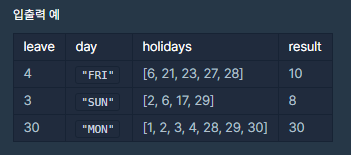



In [157]:
# 월은 1~30 
# day -> fri 
# 1-> fri 
# 토, 일, 공휴일은 쉬는날, 연속해서 연차를 붙여서 제일 길게 쓰는날 출력

# input으로 요일 입력시 -> 한달 날짜별 요일 출력

# 2)
#holidays=[2,6,17,29]
#day='sun'
#leave=3
# 해결

#일 월 화 수 목 금 토 일 월 화
#1  2  3  4  5  6  7  8  9  10   
#0  0           0  0  0      


yoyil=['mon','tue','wed','thu','fri','sat','sun']

# 3)
#holidays=[1,2,3,4,28,29,30]
#day='mon'
#leave=30
# 해결

# 1)

#holidays=[6,21,23,27,28]
#day='fri'
#leave=4
# 해결!


def find_yoyil(day_yoyil): # 0 ~29 로 맞춤
    for i in range(len(yoyil)):
        if day==yoyil[i]:
            return yoyil[(i+day_yoyil%7)%len(yoyil)]       
count=0 
result=[]

# 
leave_count=leave

# 정방향
for i in range(1,31):        
    # 연결된 주말 , # 1~30으로 하면 요일 찾을때 삑남-> -1로 빼서 넣어줌
    if i <= 29 and find_yoyil(i-1) == 'sat' or find_yoyil(i-1) == 'sun' or i in holidays and find_yoyil(i) == 'sat' or find_yoyil(i) == 'sun' or i in holidays:
        count+=1
    # 연결되지 않을경우 leave에서 하나까고 넘김
    elif find_yoyil(i-1) != 'sat' and find_yoyil(i-1) != 'sun' and i not in holidays and leave_count != 0 :
        leave_count-=1
        count+=1
    elif leave_count==0:
        result.append(count) # 생성된 것 넣기
        leave_count= leave # leave로 초기화
        count=0 # 카운트 초기화
# 역방향
count=0
leave_count=leave
for i in range(1,31):
    i=31-i
    if i==1:
        result.append(count+1) # 생성된 것 넣기
     # 연결된 주말 , # 1~30으로 하면 요일 찾을때 삑남-> -1로 빼서 넣어줌
    if i <= 29 and find_yoyil(i-1) == 'sat' or find_yoyil(i-1) == 'sun' or i in holidays and find_yoyil(i) == 'sat' or find_yoyil(i) == 'sun' or i in holidays:
        count+=1
    # 연결되지 않을경우 leave에서 하나까고 넘김
    elif find_yoyil(i-1) != 'sat' and find_yoyil(i-1) != 'sun' and i not in holidays and leave_count != 0 :
        leave_count-=1
        count+=1
    elif leave_count==0:
        result.append(count) # 생성된 것 넣기
        leave_count= leave # leave로 초기화
        count=0 # 카운트 초기화
        
        
result.sort(reverse=True)
result

# holiday=[6,21,23,27,28], 1=금 , leave=4
# 금토일월화 수 목 금 토 일 월 화 
# 1 2 3 4 5  6  7  8  9 10 11 12  
#   0 0      0        0  0  
# -> 순서대로 하니깐 이 경우롤 못 잡아냄 -> 역순으로 한번 더해서 경우의 수를 합칠까?-> 해결!!



[8, 6, 6, 6, 5, 5, 5, 4, 3]

In [135]:
for i in range(1,31):
    i=31-i
    print(i)

30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [132]:
range(31,1)

range(31, 1)

# 3. 주식가격

## 문제 설명
어떤 회사의 주식 가격을 1분 단위로 측정한 데이터가 있습니다. 당신은 이 데이터의 "상봉"과 "하봉"을 측정하려고 합니다. 상봉과 하봉의 정의는 다음과 같습니다.

상봉은 차트 상에서 가격이 상승하다가 바로 하락하는 지점을 의미합니다. 이때 상봉의 "너비"를 양옆에서 상봉까지 올라가는 구간의 수평길이 중 작은 값으로 정의합니다.
하봉은 차트 상에서 가격이 하락하다가 바로 상승하는 지점을 의미합니다. 이때 하봉의 "너비"를 양옆에서 하봉까지 내려가는 구간의 수평길이 중 작은 값으로 정의합니다.
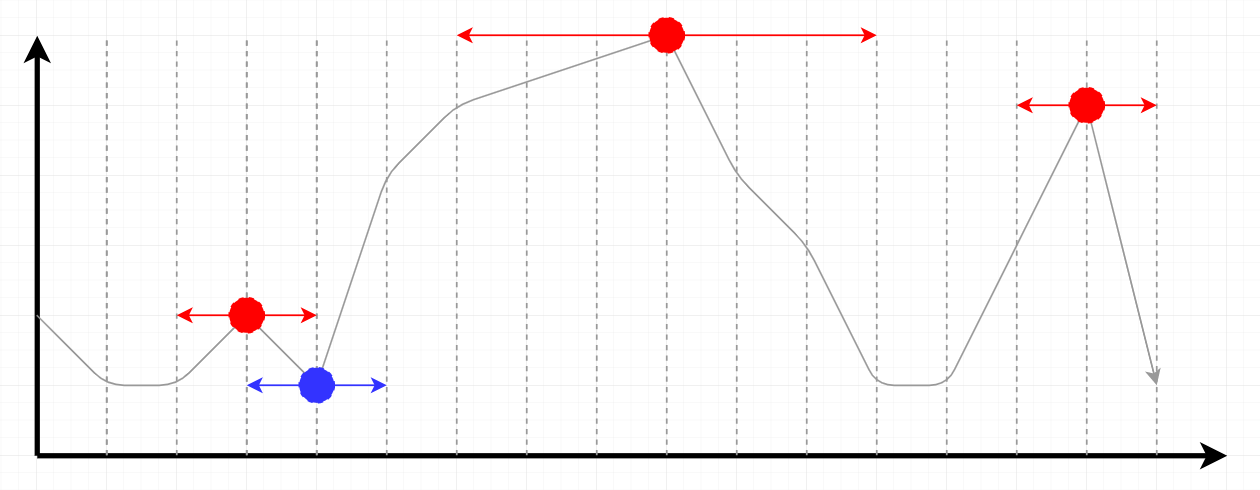

이 차트의 가로축은 시간(1칸 = 1분), 세로축은 가격(1칸 = 6원)입니다.
이 차트는 데이터 [12,6,6,12,6,24,30,32,34,36,24,18,6,6,18,30,6] 으로 만들어졌습니다.
이 차트에는 상봉(빨간색 점)이 3개, 그리고 하봉(파란색 점)이 1개 있습니다. 각 상봉의 너비는 1, 3, 1이고 유일한 하봉의 너비는 1입니다.
예를 들어 두 번째 상봉의 경우 왼쪽부터 상봉까지 올라가는 구간의 수평 길이는 5이며, 오른쪽부터 상봉까지 올라가는 구간의 수평 길이는 3입니다. 정의에 따라 둘 중 더 작은 값인 3이 이 상봉의 너비입니다.
주식 가격 데이터 prices가 매개변수로 주어집니다. 이 데이터로 만들어지는 차트의 상봉과 하봉의 너비를 (차트 상의) 왼쪽부터 차례대로 배열에 담아 return 하도록 solution 함수를 완성해주세요. 단, 상봉과 하봉을 구분하기 위해 하봉은 너비에 -1을 곱하여 배열에 담아주세요.

## 제한사항

prices의 길이는 3 이상 1,000 이하입니다.
prices의 모든 값은 1 이상 1,000,000,000 이하로, 주식의 원화 가격을 의미합니다.
prices로 만들어지는 차트 상에서 상봉과 하봉이 하나도 없는 경우는 주어지지 않습니다.

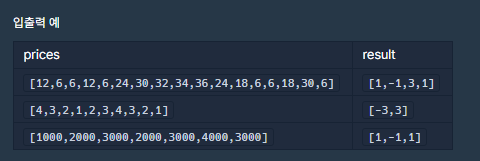

In [29]:
# 주식가격
#prices=[4,3,2,1,2,3,4,3,2,1]
#prices=[1000,2000,3000,2000,3000,4000,3000]

prices=[12,6,6,12,6,24,30,32,34,36,24,18,6,6,18,30,6]
result=[]
up=0
down=0


for i in range(len(prices)):
    print(i)
    if i < len(prices)-1 and prices[i] < prices[i+1]:
        # 상봉시작 
        if i > 1 and prices[i-1] ==  prices[i] or prices[i-1] > prices[i] or i==1:
            print('상승')
            up+=1
        elif prices[i+1] < prices[i+2]: # 상승진행 
            print('상승')
            up+=1
        #하봉끝    
    elif i > 1 and prices[i-1] < prices[i]:
        if prices[i]==prices[i+1] or prices[i] > prices[i+1]:
            if up > down: # 하봉너비 입력
                result.append(-down)
            elif down > up:    
                result.append(-up)  
            down=0
            up=0
    # 하봉시작
    elif i < len(prices)-1 and prices[i] > prices[i+1]:
        if i > 1 and prices[i-1] ==  prices[i] or prices[i-1] < prices[i] or i==1:
            print('하강')
            down+=1
        elif prices[i+1] > prices[i+2]: # 하강진행 
            print('하강')
            down+=1  
    # 상봉끝
    elif  i > 1 and prices[i-1] > prices[i] and i < len(prices)-1:
        if prices[i]==prices[i+1] or prices[i]< prices[i+1]:
            if up > down: # 상봉너비 입력
                result.append(down)
            elif down > up:    
                result.append(up)
            down=0
            up=0

result

0
하강
1
2
상승
3
4
상승
5
상승
6
상승
7
상승
8
9
10
하강
11
12
13
상승
14
15
16


[0, 0, 0]

In [34]:
# 상봉만

prices=[12,6,6,12,6,24,30,32,34,36,24,18,6,6,18,30,6]
result=[]
up=0
down=0

# 꿑이 날때 up, down 초기화  -> 넣지않고 초기화 해야 할 경우도 있음 -> 시작할때 초기화
# 시작할때 초기화 

for i in range(len(prices)):
    print(i)
    if i<len(prices)-1 and prices[i] < prices[i+1]:
         # 상봉시작     
        if i>0 and prices[i-1]>=prices[i]:
            up=0
            down=0
        elif i==0:
            up=0
            down=0
        up+=1
    # 다운진행
    elif i<len(prices)-1 and prices[i] > prices[i+1]:
        down+=1
    # 상봉끝
    elif (i> 0 and prices[i-1] > prices[i] and prices[i]<=prices[i+1]) or (i==len(prices)-1 and prices[i-1] > prices[i]):
        if up > down:
            result.append(up)
        else:
            result.append(down)
        
            
result

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


IndexError: list index out of range

In [35]:
len(prices)

17

In [25]:
a=[1,2,3]
b=[3,4,5]
c=[2,6,7]

for i in range(10):
    if i in a and (i in b or i in c):
        print(i)

2
3


# 4. 정삼각형

문제 설명
모든 칸이 동일한 크기의 작은 정삼각형으로 이루어진 정삼각형 모양의 격자가 있습니다. 각 칸은 빨간색 또는 파란색으로 색칠되어 있으며, 당신은 이 격자에서 다음과 같은 규칙으로 움직입니다.

어떤 칸에 입장했을 때, 해당 칸의 색이 빨간색이라면 우회전을, 파란색이라면 좌회전을 해서 나갑니다.
다음 그림은 크기가 2인 격자가 색칠되어 있고, 격자에 입장했다가 퇴장하는 경로 6가지를 나타낸 것입니다.

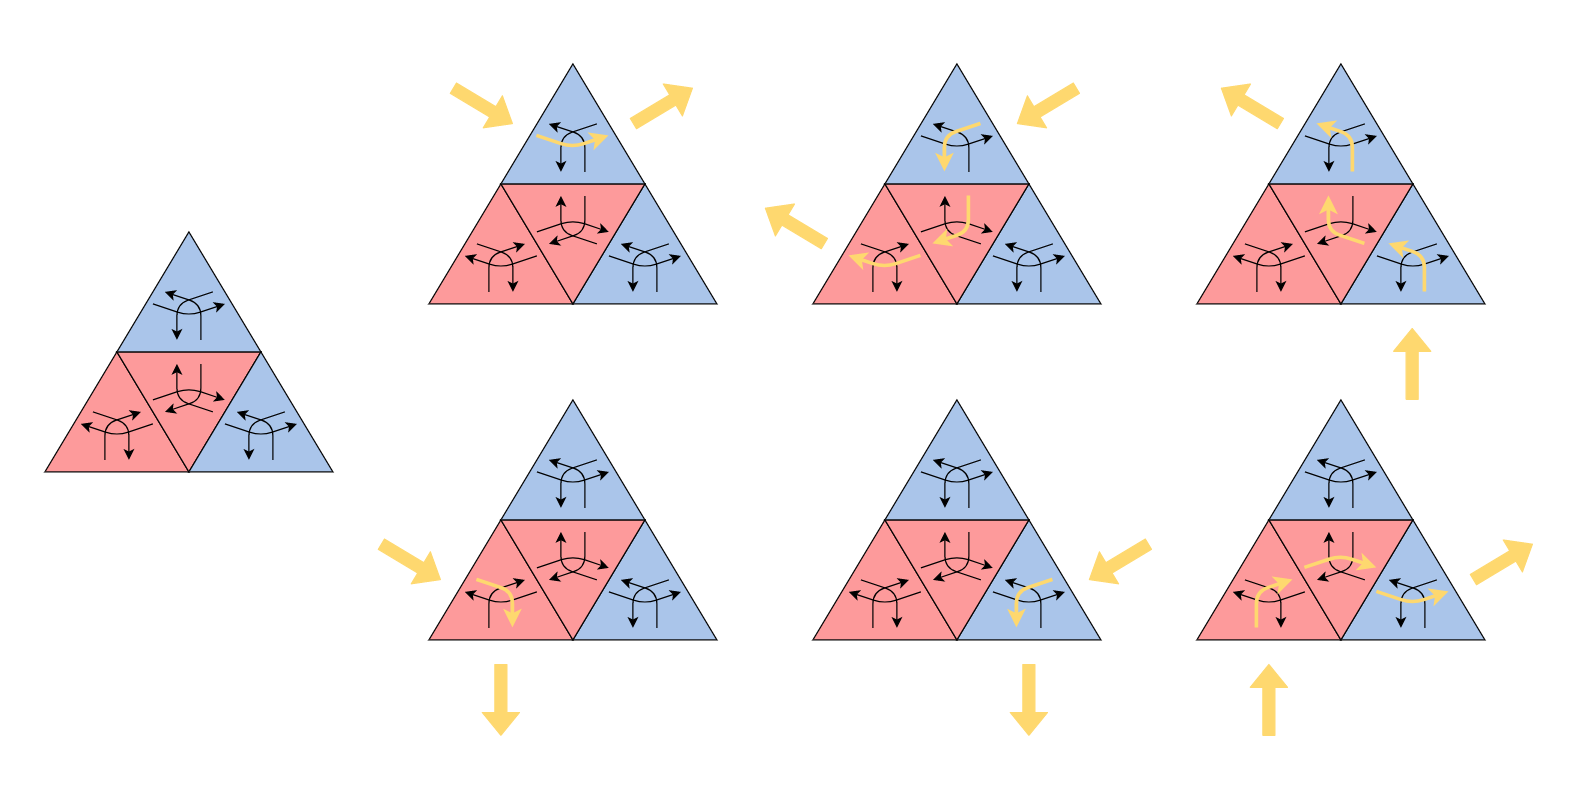

위 격자에서 가장 많은 칸을 거치는 경로는 3개의 칸을 거친다는 것을 알 수 있습니다.

삼각형 격자의 색깔 분포를 나타내는 문자열 배열 grid가 매개변수로 주어집니다. 주어진 격자에 입장했다가 퇴장하는 경로들 중에서, 가장 많은 칸을 거치는 경로를 찾아, 그 경로가 거치는 칸의 개수를 return 하도록 solution 함수를 완성해주세요. 이때, 한번 지나간 칸을 다시 한번 지나가는 것도 중복해서 세야 합니다.

# 제한사항

grid의 길이는 1 이상 200 이하입니다.
grid의 모든 문자열은 "R"과 "B"로 이루어져 있습니다.
R은 해당 칸이 빨간색, B는 해당 칸이 파란색 격자임을 나타냅니다.
grid의 i번째 문자열(0부터 시작)의 길이는 2 x i + 1 입니다.
이는 격자의 i번째 행의 색깔 분포를 나타냅니다.
i번째 행의 가장 왼쪽에 있는 작은 정삼각형 칸 부터 순서대로 색깔을 나타냅니다.
각 행의 짝수 번째(0번째 부터 시작하며, 0은 짝수로 가정) 문자는 정방향, 홀수 번째 문자는 역방향 작은 정삼각형의 색깔을 나타냅니다.


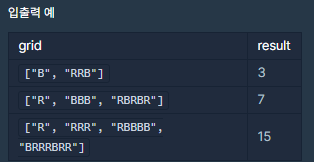